## MOVIE RATING PREDICTION

**Problem Statement**
 To Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.

**importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


## Exploring the dataset

In [3]:
df.describe(include="all")

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


**Year should be in int Type**

 **Duration should in int type**
 
 **votes should be in int type**

## Data preprocessing

In [5]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
print(df["Year"].unique())
print("total years:",len(df["Year"].unique()))

[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)' '(1938)'
 '(1941)' '(1931)' '(1937)' '(2022)' '(1932)' '(1923)' '(1915)' '(1928)'
 '(1922)' '(1917)' '(1913)' '(1930)' '(1926)' '(1914)' '(1924)']
total years: 103


**rating is an output variable and it has some missing values**

**since it is an output variable we cannot replace them ,so we have to drop the rows where voting is null**

In [7]:
print(df["Rating"].unique())
print("Total Ratings",len(df["Rating"].unique()))

[ nan  7.   4.4  4.7  7.4  5.6  4.   6.2  5.9  6.5  5.7  6.3  7.2  6.6
  7.3  7.1  6.9  3.5  5.   4.5  6.4  4.1  4.8  8.1  5.5  6.8  6.1  7.7
  5.1  7.6  3.1  3.3  7.8  8.4  5.2  4.3  5.8  4.6  7.5  6.7  3.6  3.9
  5.4  4.2  5.3  3.4  3.   8.   6.   3.8  7.9  2.7  4.9  2.4  3.7  3.2
  2.5  2.8  2.6  2.9  8.2  8.7  8.3  9.3  8.8  2.1  2.3  8.5  8.6  9.
  9.6  1.7  9.1  2.   1.4  8.9  1.9  9.4  9.7  1.8  9.2  1.6 10.   2.2
  1.1]
Total Ratings 85


In [8]:
df["Genre"].unique()

array(['Drama', 'Drama, Musical', 'Comedy, Romance',
       'Comedy, Drama, Musical', 'Drama, Romance, War', 'Documentary',
       'Horror, Mystery, Thriller', 'Action, Crime, Thriller', 'Horror',
       'Horror, Romance, Thriller', 'Comedy, Drama, Romance', 'Thriller',
       'Comedy, Drama', nan, 'Comedy, Drama, Fantasy',
       'Comedy, Drama, Family', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Biography', 'Comedy, Horror', 'Action',
       'Drama, Horror, Mystery', 'Comedy', 'Action, Thriller',
       'Drama, History', 'Drama, History, Sport',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'War', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Drama, Romance', 'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Dr

In [9]:
print(df["Director"].unique())
print(len(df["Director"].unique()))

['J.S. Randhawa' 'Gaurav Bakshi' 'Soumyajit Majumdar' ... 'Mozez Singh'
 'Ved Prakash' 'Kiran Thej']
5939


In [10]:
df.duplicated().sum()

6

In [11]:
df.drop_duplicates(inplace=True)
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


## Visualizing some trends

In [12]:
best_rating=df[['Name','Rating']]
best_rating

,Name,Rating
0,,NaN
1,#Gadhvi (He thought he was Gandhi),7.0
2,#Homecoming,NaN
3,#Yaaram,4.4
4,...And Once Again,NaN
...,...,...
15504,Zulm Ko Jala Doonga,4.6
15505,Zulmi,4.5
15506,Zulmi Raj,NaN
15507,Zulmi Shikari,NaN


**top10 rated movies**

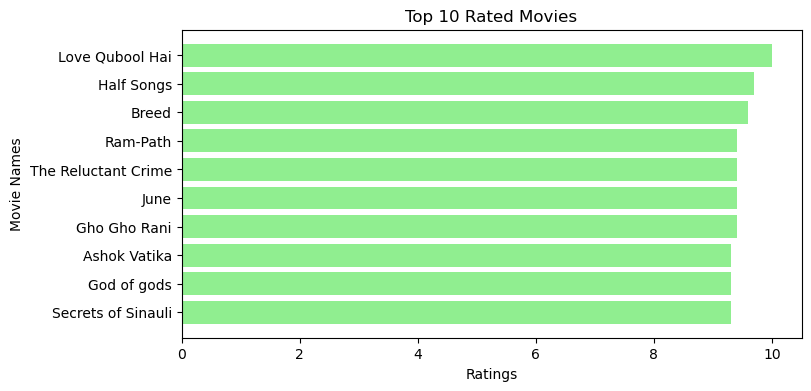

In [13]:
top_rated_movies = best_rating.sort_values(by='Rating', ascending=False).head(10)
plt.figure(figsize=(8, 4))
plt.barh(y=top_rated_movies["Name"], width=top_rated_movies["Rating"], color='lightgreen')
plt.xlabel("Ratings")
plt.ylabel("Movie Names")
plt.title("Top 10 Rated Movies")
plt.gca().invert_yaxis()
plt.show()

**relation between movie length and rating**

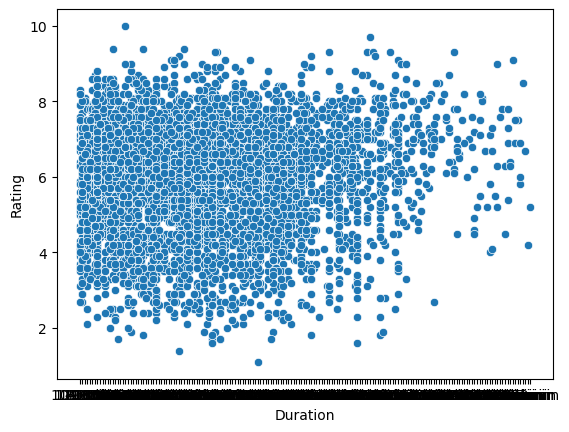

In [14]:
movie_l_r=df[['Duration','Rating']]
movie_l_r.dropna(inplace=True)
sns.scatterplot(x='Duration',y='Rating',data=movie_l_r)
plt.show()

**Year wise Best rating**

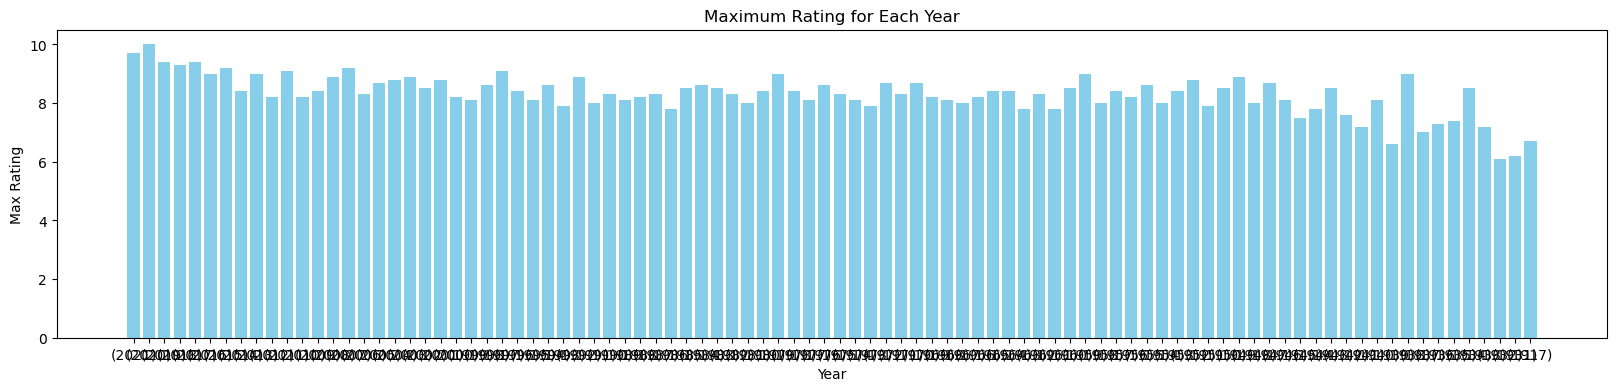

In [15]:
year_best = df[['Year', 'Rating']]
year_best.dropna(inplace=True)
unique_years = sorted(year_best['Year'].unique(), reverse=True)

max_ratings = []
for year in unique_years:
    max_ratings.append(year_best[year_best['Year'] == year]['Rating'].max())
plt.figure(figsize=(20,4))
plt.bar(x=unique_years, height=max_ratings, color='skyblue',width=0.8)
plt.xlabel("Year")
plt.ylabel("Max Rating")
plt.title("Maximum Rating for Each Year")
plt.show()

**By using line plot**

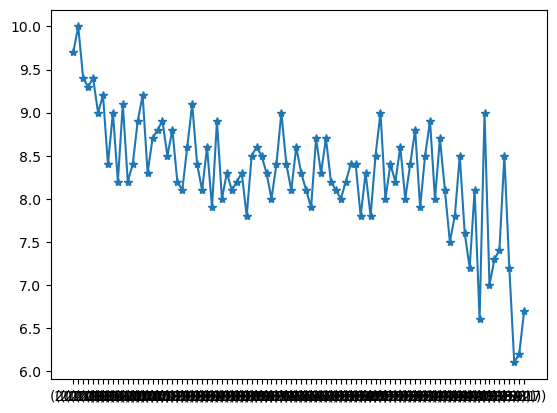

In [16]:
plt.plot(unique_years, max_ratings,marker='*')

plt.show()

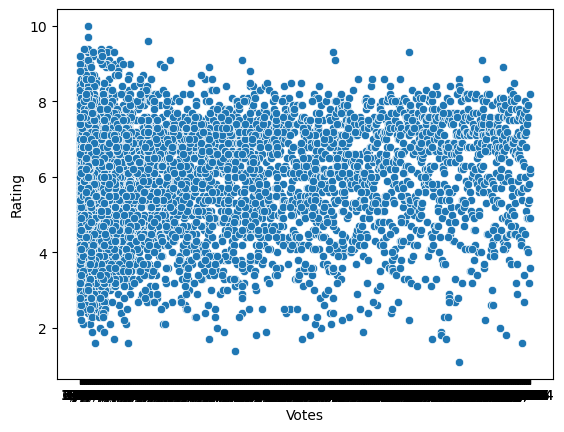

In [17]:
votes_and_rating=df[['Votes','Rating']]

votes_and_rating.dropna(inplace=True)
sns.scatterplot(x='Votes',y='Rating',data=votes_and_rating)
plt.show()

**most movie directed director and count**

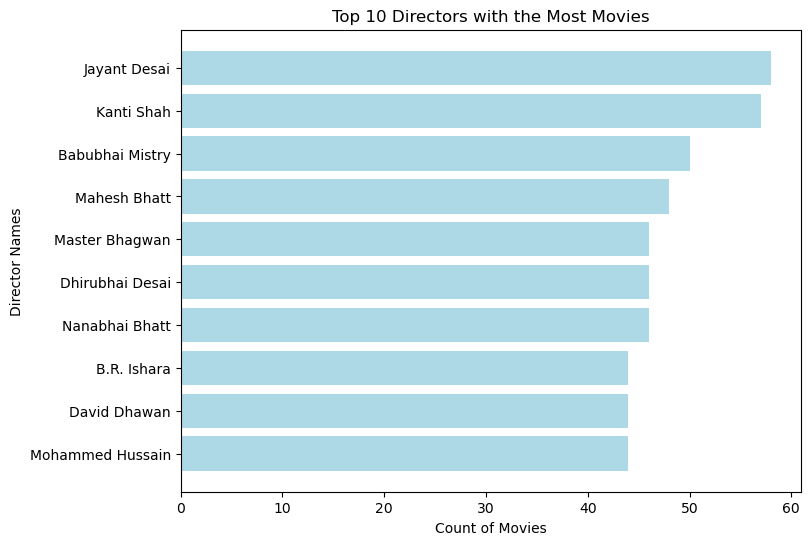

In [18]:

most_movies = df['Director'].value_counts().sort_values(ascending=False).head(10)


top_directors_df = pd.DataFrame({'Director': most_movies.index, 'MovieCount': most_movies.values})

plt.figure(figsize=(8, 6))
plt.barh(y=top_directors_df['Director'], width=top_directors_df['MovieCount'], color='lightblue')
plt.xlabel("Count of Movies")
plt.ylabel("Director Names")
plt.title("Top 10 Directors with the Most Movies")
plt.gca().invert_yaxis()
plt.show()

**most movies acted actors**

In [19]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])
actors

0             Manmauji
1         Rasika Dugal
2         Sayani Gupta
3              Prateik
4         Rajat Kapoor
             ...      
15504    Suparna Anand
15505      Aruna Irani
15506              NaN
15507              NaN
15508      Arjun Sarja
Length: 46509, dtype: object

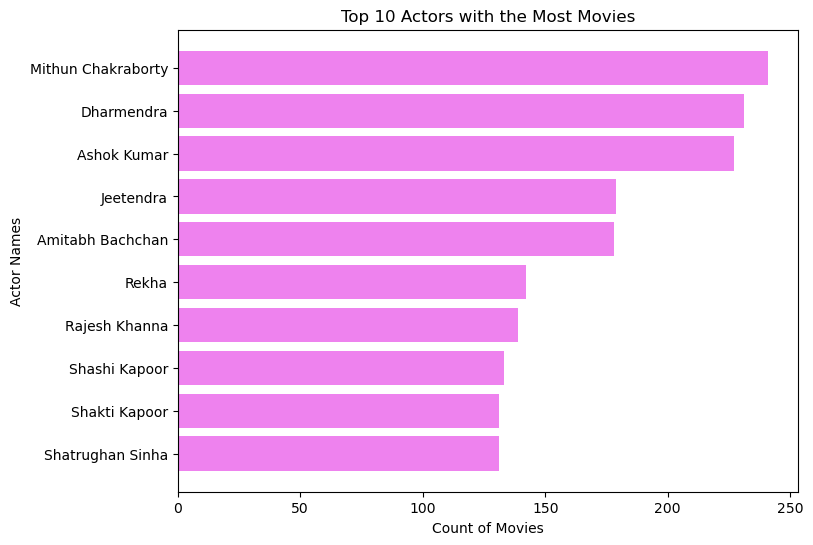

In [20]:
actors_mm = actors.value_counts().sort_values(ascending=False).head(10)


top_actors_df = pd.DataFrame({'Actors': actors_mm.index, 'MovieCount': actors_mm.values})

plt.figure(figsize=(8, 6))
plt.barh(y=top_actors_df['Actors'], width=top_actors_df['MovieCount'], color='violet')
plt.xlabel("Count of Movies")
plt.ylabel("Actor Names")
plt.title("Top 10 Actors with the Most Movies")
plt.gca().invert_yaxis()
plt.show()

In [21]:
df


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


## Data cleaning

**Dropping unwanted columns**

In [22]:
df.drop(["Name",'Actor 2','Actor 3','Genre'],axis=1,inplace=True)
df

,Year,Duration,Rating,Votes,Director,Actor 1
0,NaN,NaN,NaN,NaN,J.S. Randhawa,Manmauji
1,(2019),109 min,7.0,8,Gaurav Bakshi,Rasika Dugal
2,(2021),90 min,NaN,NaN,Soumyajit Majumdar,Sayani Gupta
3,(2019),110 min,4.4,35,Ovais Khan,Prateik
4,(2010),105 min,NaN,NaN,Amol Palekar,Rajat Kapoor
...,...,...,...,...,...,...
15504,(1988),NaN,4.6,11,Mahendra Shah,Naseeruddin Shah
15505,(1999),129 min,4.5,655,Kuku Kohli,Akshay Kumar
15506,(2005),NaN,NaN,NaN,Kiran Thej,Sangeeta Tiwari
15507,(1988),NaN,NaN,NaN,NaN,NaN


**Changing object to int**

In [23]:
df['Duration'] = pd.to_numeric(df['Duration'].str.replace('[^\d]', '', regex=True), errors='coerce').astype('Int64')

In [24]:
df['Year'] = pd.to_numeric(df['Year'].str.replace('[^\d]', '', regex=True), errors='coerce').astype('Int64')
df['Votes'] = pd.to_numeric(df['Votes'].str.replace('[^\d]', '', regex=True), errors='coerce').astype('Int64')

In [25]:
df

,Year,Duration,Rating,Votes,Director,Actor 1
0,<NA>,<NA>,NaN,<NA>,J.S. Randhawa,Manmauji
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal
2,2021,90,NaN,<NA>,Soumyajit Majumdar,Sayani Gupta
3,2019,110,4.4,35,Ovais Khan,Prateik
4,2010,105,NaN,<NA>,Amol Palekar,Rajat Kapoor
...,...,...,...,...,...,...
15504,1988,<NA>,4.6,11,Mahendra Shah,Naseeruddin Shah
15505,1999,129,4.5,655,Kuku Kohli,Akshay Kumar
15506,2005,<NA>,NaN,<NA>,Kiran Thej,Sangeeta Tiwari
15507,1988,<NA>,NaN,<NA>,NaN,NaN


**dropping the rows where there is nan value in ratings**

In [26]:
df.dropna(subset=['Rating'], inplace=True)
df

,Year,Duration,Rating,Votes,Director,Actor 1
1,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal
3,2019,110,4.4,35,Ovais Khan,Prateik
5,1997,147,4.7,827,Rahul Rawail,Bobby Deol
6,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill
8,2012,82,5.6,326,Allyson Patel,Yash Dave
...,...,...,...,...,...,...
15501,1992,<NA>,5.3,135,Bharat Rangachary,Dharmendra
15503,1989,125,5.8,44,S.P. Muthuraman,Chiranjeevi
15504,1988,<NA>,4.6,11,Mahendra Shah,Naseeruddin Shah
15505,1999,129,4.5,655,Kuku Kohli,Akshay Kumar


In [27]:
df.isnull().sum()

Year           0
Duration    2068
Rating         0
Votes          0
Director       5
Actor 1      125
dtype: int64

In [28]:
df['Duration'].fillna(df["Duration"].median(),inplace=True)
df.isnull().sum()

Year          0
Duration      0
Rating        0
Votes         0
Director      5
Actor 1     125
dtype: int64

In [29]:
df.dtypes

Year          Int64
Duration      Int64
Rating      float64
Votes         Int64
Director     object
Actor 1      object
dtype: object

In [30]:
df.dropna(subset=['Actor 1'], inplace=True)
df["director_encoded"]=df.groupby("Director")['Rating'].transform('mean')
df["Actor_encoded"]=df.groupby("Actor 1")['Rating'].transform('mean')
df.isnull().sum()
df.drop(["Actor 1","Director"],axis=1,inplace=True)

## Best random state

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
x=pd.get_dummies(df.drop('Rating',axis=1),drop_first=True)
y=df['Rating']
Train = []
Test = []
cv = []

for i in range(0, 100):
    # Split the data into train and test sets with a different random_state in each iteration
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)

    # Modeling
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Prediction
    ypred_train = model.predict(x_train)
    ypred_test = model.predict(x_test)

    # Calculate scores and append to lists
    Train.append(model.score(x_train, y_train))
    Test.append(model.score(x_test, y_test))
    cv.append(cross_val_score(model, x, y, cv=5).mean())

em = pd.DataFrame({"Train": Train, "Test": Test, "cv": cv})

# Filter for rows where the absolute differences are within the specified threshold
gm = em[(abs(em['Train'] - em["Test"]) <= 0.05) & (abs(em['Test'] - em['cv']) <= 0.05)]

# Find the index with the maximum 'Test' score
best_random_state = gm["Test"].idxmax()

print("Best random_state:", best_random_state)


Best random_state: 45


### Train Test Split

In [32]:
x=df.drop('Rating',axis=1)
y=df['Rating']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [33]:
## modelling
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

##prediction
ypred_train=model.predict(x_train)
ypred_test=model.predict(x_test)

##evalution
print("train r2:",model.score(x_train,y_train))
print("test r2:",model.score(x_test,y_test))

from sklearn.model_selection import cross_val_score
print("cross_val_score:",cross_val_score(model,x,y,cv=5).mean())

train r2: 0.6902497013401836
test r2: 0.7337964501726635
cross_val_score: 0.6976431187604281


## checking the assumptions

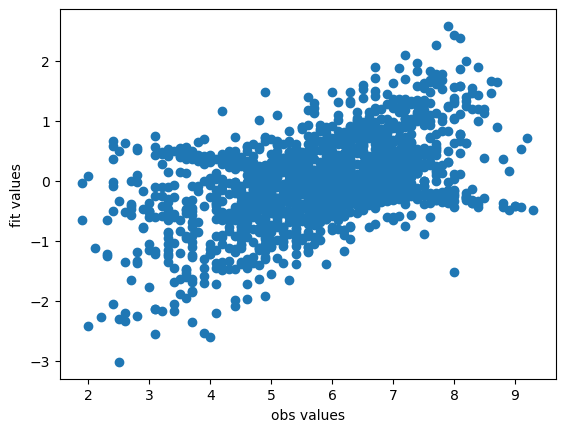

In [34]:
## linearity of errors
test_err=y_test-ypred_test
plt.scatter(y_test,test_err)
plt.xlabel("obs values")
plt.ylabel("fit values")
plt.show()

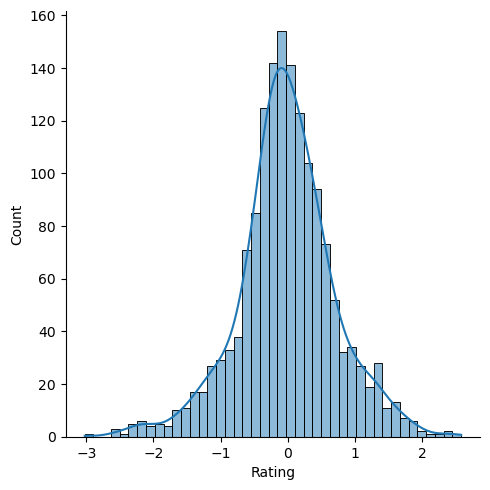

In [35]:
## normality of errors
sns.displot(test_err,kde=True)
plt.show()

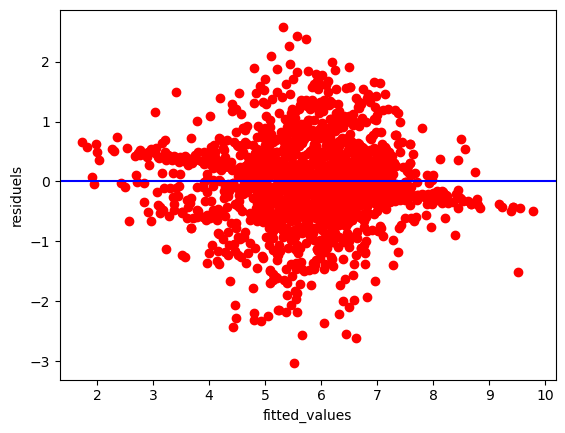

In [36]:
test_err.skew()
## equal variance of errors
plt.scatter(ypred_test,test_err,c="r")
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.ylabel("residuels")
plt.show()

### Hence all the assumptions satisfied our model is a good model

## deployment of the model

In [37]:
from joblib import dump
dump(model,"movie_prediction.joblib")

['movie_prediction.joblib']